<a href="https://colab.research.google.com/github/Sushmakumar369/Assignments/blob/main/DSA_EXIT_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries



In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset


In [142]:
data = pd.read_csv('/content/customer_churn.csv')

In [143]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Understanding the dataset


In [144]:
data.shape

(7043, 21)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [146]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [147]:
data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7030,7030,7006,7028,7028,7028,7028,7021,7029,7018,7029,7042,7036,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6526,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6349,3382,3081,3492,3083,3090,3466,2802,2780,3860,4165,2365,11,5174


In [148]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


Label Encoding

In [149]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [150]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [151]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0.0,1,0,1.0,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2503,0
1,3962,1,0.0,0,0,34.0,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1464,0
2,2564,1,0.0,0,0,2.0,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0.0,0,0,45.0,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1398,0
4,6511,0,0.0,0,0,2.0,1,0,1,0,...,0,0,0,0,0,1,2,70.70,924,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0.0,1,1,24.0,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1595,0
7039,1525,0,0.0,1,1,72.0,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5695,0
7040,3367,0,0.0,1,1,11.0,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2992,0
7041,5934,1,1.0,1,0,4.0,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2658,1


In [152]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Handling Outliers

In [153]:
for i in['SeniorCitizen','tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']:
  data[i]=data[i].fillna(data[i].median())
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


Visualisations


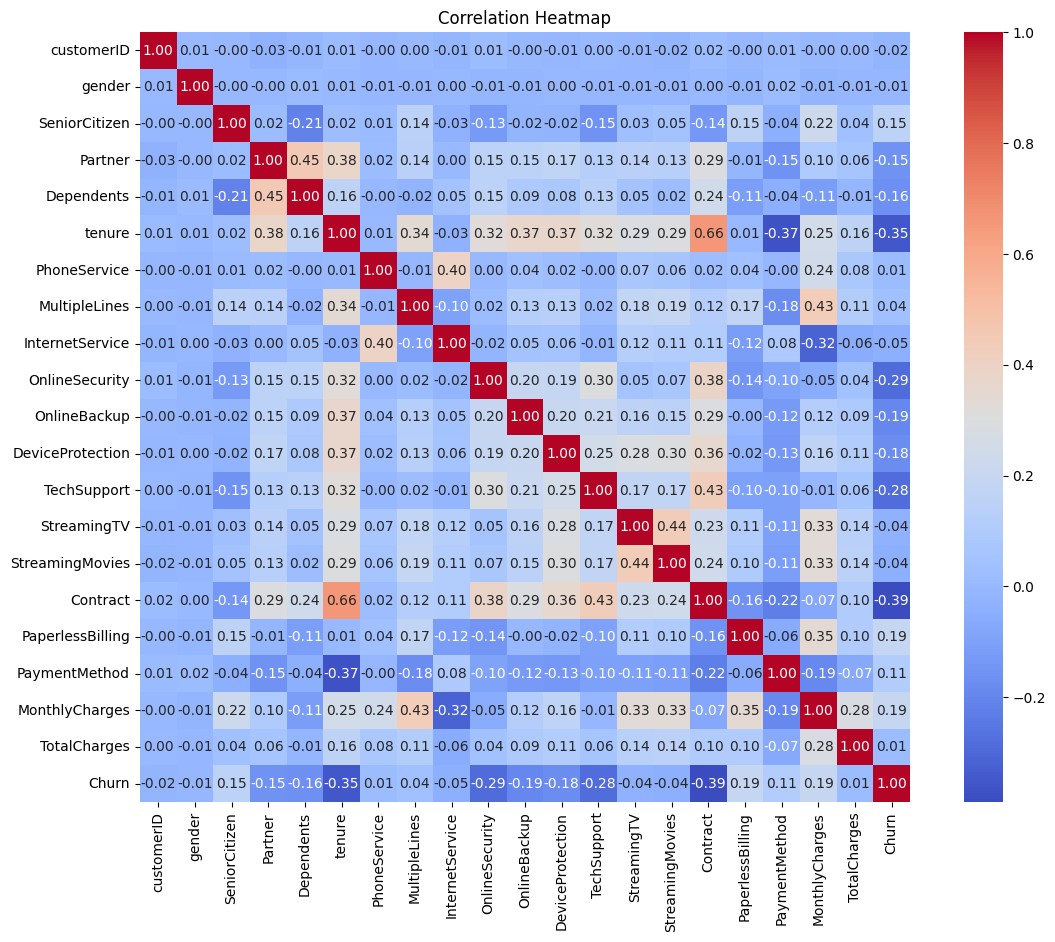

In [155]:
plt.figure(figsize=(14, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

<Axes: ylabel='TotalCharges'>

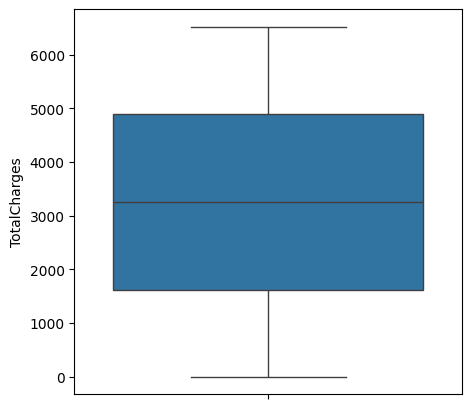

In [156]:
plt.figure(figsize=(5,5))
sns.boxplot(data['TotalCharges'])

Splitting the Dataset

In [157]:
x=data.drop(['customerID', 'gender', 'Partner','Churn'],axis=1)

In [158]:
x

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2503
1,0.0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1464
2,0.0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,0.0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1398
4,0.0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1595
7039,0.0,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5695
7040,0.0,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2992
7041,1.0,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2658


In [159]:
y=data['Churn']

In [160]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


Train-Test Split

In [161]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Machine Learning Algorithms


---



LINEAR REGRESSON

In [162]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [163]:
model=lr.fit(x_train,y_train)

In [164]:
predictions=model.predict(x_test)
predictions

array([ 0.50176188,  0.16360377, -0.10640392, ...,  0.09354114,
        0.01245669,  0.45155574])

In [165]:
y_test

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6366,0
315,0
2439,0
5002,0


MEAN SQUARED ERROR

In [166]:
from sklearn.metrics import mean_squared_error
print('MSE IS:\n',mean_squared_error(y_test,predictions))

MSE IS:
 0.1374397171072598


R SQUARED ERROR

In [167]:
from sklearn.metrics import r2_score
print('R SQUARED VALUE IS:\n', r2_score(y_test,predictions))

R SQUARED VALUE IS:
 0.2939009103418547
